Carga de las bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
sns.set()

##Ejerccio #1 Trabaje con el Archivo Movies

##Carga del dataset Movies



delimiter= ',',encoding='latin-1')     https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte


In [ ]:
data = pd.read_csv('/content/movies.csv',delimiter= ',',encoding='latin-1')

In [ ]:
data.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
data.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [ ]:
data.dtypes 

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [ ]:
data.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

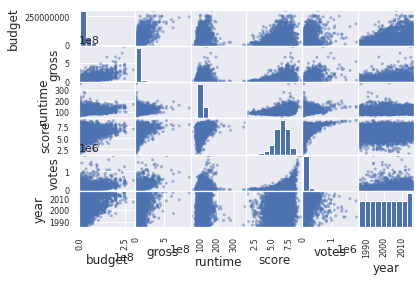

In [ ]:
from pandas.plotting import scatter_matrix # diagramas de correlacción

scatter_matrix(data)
plt.show()

Trabaje con las columnas de budget y groos

Primero hago una copia del dataset

In [ ]:
data1 = data.copy()

In [ ]:
data1.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


Seleccione dos columnas

In [ ]:
datos = data1.iloc[:,[0,5]].values

In [ ]:
datos

array([[8.00000000e+06, 5.22874140e+07],
       [6.00000000e+06, 7.01363690e+07],
       [1.50000000e+07, 1.79800601e+08],
       ...,
       [3.50000000e+06, 3.77500000e+06],
       [0.00000000e+00, 2.59810000e+04],
       [0.00000000e+00, 3.77570000e+04]])

Grafico de correlación

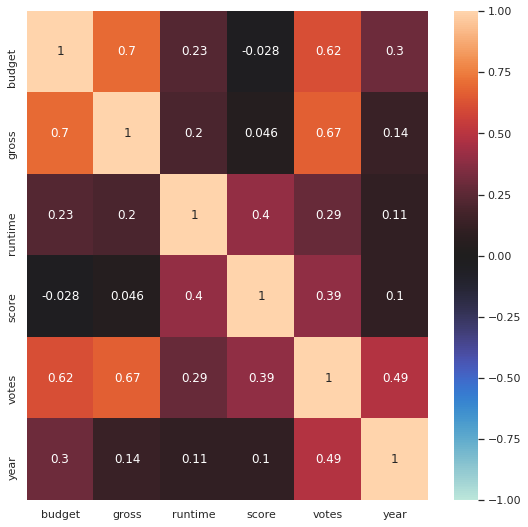

In [ ]:
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

Clusterización

Use el metodo de K-Means

In [ ]:
# Reasignación de variables
x = datos

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans # se importa el algoritmo de k medias

def elbow_method(epsilon, figure=False):
    wcss = [] # defino un vector en 0 para ver los distintos wcss segun el numero de clusters que defina
    
    diff = np.inf # Valor de diferencia entre dos iteraciones
    i = 1
    
    while diff > epsilon:
        print("Iteracion Nº Clusters: k: {k}".format(k=i))
        
        # Con init= k-means++ y con n_init defino que quiero usar la opcion de ++ (que tiene en cuenta la posicion inicial y su influencia) 
        # y que tome 10 posiciones iniciales para comparar
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(x)
        
        # Primera iteracion
        if diff == np.inf:
            diff = kmeans.inertia_
        # Si ya fuese 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Resto de iteraciones
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1
    
    if figure:
        plt.plot(range(0,len(wcss)), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Numbero de Clusters')
        plt.ylabel('WCSS')
        plt.show()
    
    # Clusters finales
    k = i-1
    return wcss, k

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4
Iteracion Nº Clusters: k: 5
Iteracion Nº Clusters: k: 6
Iteracion Nº Clusters: k: 7
Iteracion Nº Clusters: k: 8
Iteracion Nº Clusters: k: 9
Iteracion Nº Clusters: k: 10
Iteracion Nº Clusters: k: 11
Iteracion Nº Clusters: k: 12
Iteracion Nº Clusters: k: 13
Iteracion Nº Clusters: k: 14
Iteracion Nº Clusters: k: 15
Iteracion Nº Clusters: k: 16
Iteracion Nº Clusters: k: 17
Iteracion Nº Clusters: k: 18


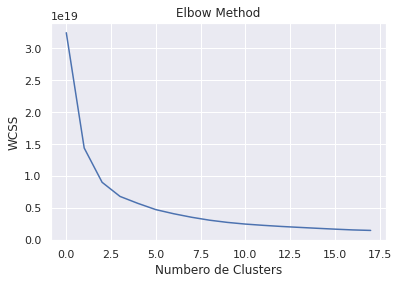

In [ ]:
# Visualizacion de los resultados
epsilon = 0.05 # Valor umbral
wcss, _ = elbow_method(epsilon, figure=True)

In [ ]:
# Obtencion de la k optima
epsilon = 0.33
_, k = elbow_method(epsilon, figure=False)

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4


In [ ]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) 

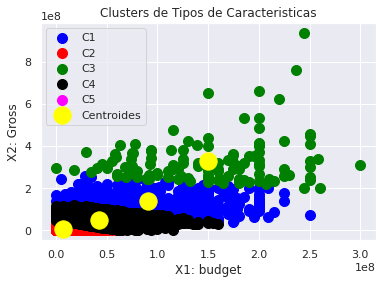

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'black', label = 'C4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'C5')
# Para darle o asignarle los colores a los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Tipos de Caracteristicas')
plt.xlabel('X1: budget')
plt.ylabel('X2: Gross')
plt.legend() # Esta es opcional para pintar la leyenda del recuadro
plt.show()

In [ ]:
# K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) # fit_predict devuelve para cada punto a que cluster pertenece

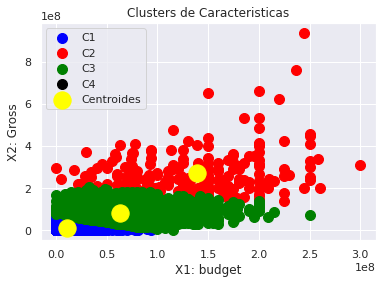

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'black', label = 'C4')
# Para pintar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Caracteristicas')
plt.xlabel('X1: budget')
plt.ylabel('X2: Gross')
plt.legend()
plt.show()

Se observa la gneración de los clusters, en lo que algunos quedan muy juntos
el cluster 1, va desde 0 a 1 en budget, y de 0 a 0.5 en Gross.
el cluster 2, va desde 0 a 2 en budget y de 0 a 2 en Gross
el cluster 3, 0 a 2 budget y cercano a 0 a 2 en Gross
el cluster 4 no se puede observar, posiblemente en otra forma de representación se pueda observar.

Algunos clientes quedan en una u otra categoria según el nivel de aporte de utilidad

## Ejercicio # 2 trabaje con el archivo CC.General

##Importar el archivo Balance

In [ ]:
data2 = pd.read_csv('/content/CC GENERAL.csv',delimiter= ',',encoding='latin-1')

In [ ]:
data2.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


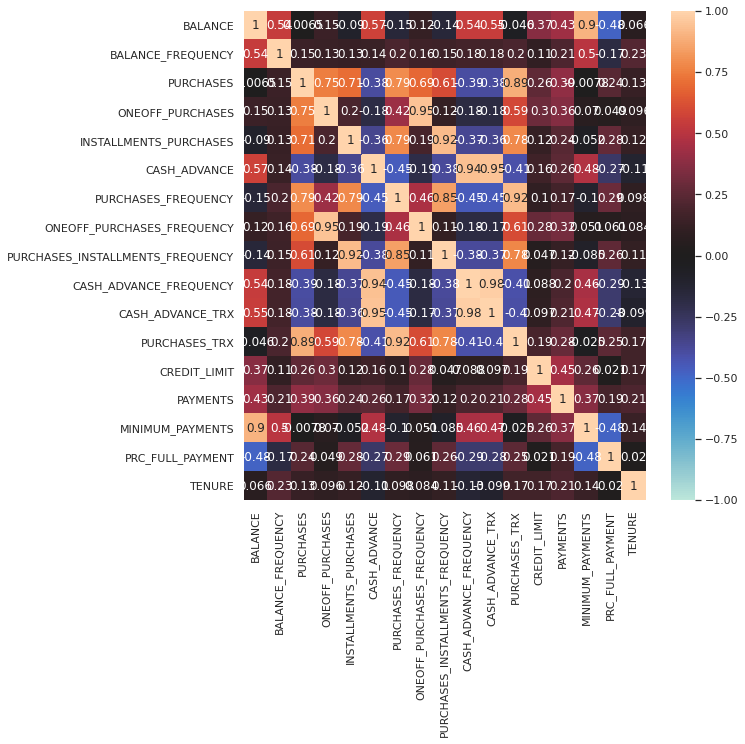

In [ ]:
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(data2.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
datos1 = data2.iloc[:,[1,3]].values   # se trabaj con las caracteristicas ed Balance y Purchaces

In [ ]:
datos1

array([[  40.900749,   95.4     ],
       [3202.467416,    0.      ],
       [2495.148862,  773.17    ],
       ...,
       [  23.398673,  144.4     ],
       [  13.457564,    0.      ],
       [ 372.708075, 1093.25    ]])

In [ ]:
# Reasignación de variables
x1 = datos1

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans # se importa el algoritmo de k medias

def elbow_method(epsilon, figure=False):
    wcss = [] # defino un vector en 0 para ver los distintos wcss segun el numero de clusters que defina
    
    diff = np.inf # Valor de diferencia entre dos iteraciones
    i = 1
    
    while diff > epsilon:
        print("Iteracion Nº Clusters: k: {k}".format(k=i))
        
        # Con init= k-means++ y con n_init defino que quiero usar la opcion de ++ (que tiene en cuenta la posicion inicial y su influencia) 
        # y que tome 10 posiciones iniciales para comparar
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(x1)
        
        # Primera iteracion
        if diff == np.inf:
            diff = kmeans.inertia_
        # Si ya fuese 0
        elif kmeans.inertia_ == 0:
            wcss.append(kmeans.inertia_)
            break
        # Resto de iteraciones
        else:
            diff = (wcss[-1] - kmeans.inertia_)/wcss[-1]
        wcss.append(kmeans.inertia_)
        i += 1
    
    if figure:
        plt.plot(range(0,len(wcss)), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Numbero de Clusters')
        plt.ylabel('WCSS')
        plt.show()
    
    # Clusters finales
    k = i-1
    return wcss, k

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4
Iteracion Nº Clusters: k: 5
Iteracion Nº Clusters: k: 6
Iteracion Nº Clusters: k: 7
Iteracion Nº Clusters: k: 8
Iteracion Nº Clusters: k: 9
Iteracion Nº Clusters: k: 10
Iteracion Nº Clusters: k: 11
Iteracion Nº Clusters: k: 12
Iteracion Nº Clusters: k: 13
Iteracion Nº Clusters: k: 14
Iteracion Nº Clusters: k: 15
Iteracion Nº Clusters: k: 16
Iteracion Nº Clusters: k: 17
Iteracion Nº Clusters: k: 18
Iteracion Nº Clusters: k: 19
Iteracion Nº Clusters: k: 20


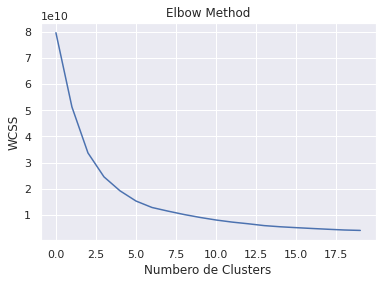

In [ ]:
# Visualizacion de los resultados
epsilon = 0.05 # Valor umbral
wcss, _ = elbow_method(epsilon, figure=True)

In [ ]:
# Obtencion de la k optima
epsilon = 0.33
_, k = elbow_method(epsilon, figure=False)

Iteracion Nº Clusters: k: 1
Iteracion Nº Clusters: k: 2
Iteracion Nº Clusters: k: 3
Iteracion Nº Clusters: k: 4


In [ ]:
# K-means
kmeans = KMeans(n_clusters = k, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x1) 

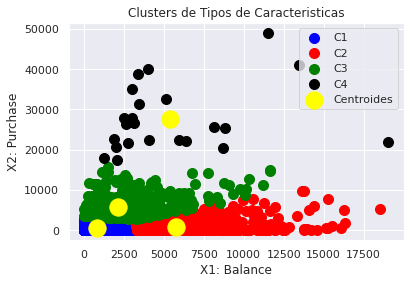

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x1[y_kmeans == 3, 0], x1[y_kmeans == 3, 1], s = 100, c = 'black', label = 'C4')

# Para darle o asignarle los colores a los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroides') 
plt.title('Clusters de Tipos de Caracteristicas')
plt.xlabel('X1: Balance')
plt.ylabel('X2: Purchase')
plt.legend() # Esta es opcional para pintar la leyenda del recuadro
plt.show()

Clusterizacion Jerarquica

In [ ]:
### Dendograma para tener el numero optimo de clusters
# Se va a usar a usar una biblioteca nueva, y con ello busco ver el numero optimo de clusters
import scipy.cluster.hierarchy as sch

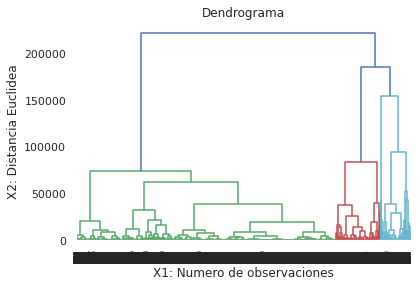

In [ ]:
# Se usa el metodo 'ward' que intenta minimizar la varianza entre clusters. 
# En lugar de minimizar el WC minimal square, se hace con la varianza -> minimizar la varianza en cada cluster
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward')) 
plt.title('Dendrograma')
plt.xlabel('X1: Numero de observaciones')
plt.ylabel('X2: Distancia Euclidea')
plt.show()

In [ ]:
# Entrenar el algoritmo con los datos del conjunto
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1) # Con fit_predict se obtiene el cluster asignado a cada punto

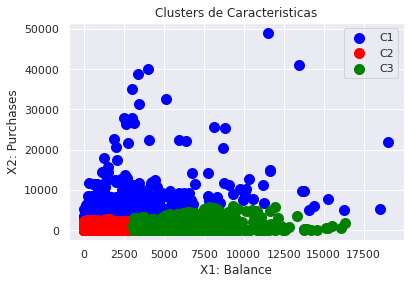

In [ ]:
### Visualizar clusters (se pintan uno a uno)
plt.scatter(x1[y_hc == 0, 0], x1[y_hc == 0, 1], s = 100, c = 'blue', label = 'C1') 
plt.scatter(x1[y_hc == 1, 0], x1[y_hc == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(x1[y_hc == 2, 0], x1[y_hc == 2, 1], s = 100, c = 'green', label = 'C3')

# Visualizando Grafico en dos dimensiones
plt.title('Clusters de Caracteristicas')
plt.xlabel('X1: Balance')
plt.ylabel('X2: Purchases')
plt.legend()
plt.show()

Tenemos un cluster c1 de entre 300 a 7000 en balance, y de entre 5000 a 15000 en purchases.
tenemos otro cluster C2 de entre 0 a 2800 en balance, y de 0 a 4000 en purchases.
Otro cluster de 2800 a 12500 en balance y de 0 a 7000 a purchases

Se puede observar un determinado de clientes según el comportamiento de compras realiadas, según el nivel o capacidad de compras, puede direccionarse una campaña, promoción o canalizar el tipo de producto que estos clientes consumen, con esto se puede generar mejores reditos en los procesos de ventas.